<a href="https://colab.research.google.com/github/AbhiRam36/decisiontree-536/blob/main/decisionTree4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from math import*

In [230]:
import copy
from graphviz import Digraph

In [295]:
dataset='echo'
split_func='IG'

In [296]:
datasets={'weather':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/eighthr.data.csv','0'],'dermatology':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/dermatology.data.csv','2'],'echo':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/echocardiogram.data.csv','71'],'lymphography':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/lymph.csv','lymphatics'],'heart':['https://raw.githubusercontent.com/AbhiRam36/decisiontree-536/main/SPECTF.train.csv' ,'1']}

In [298]:
dataset_url,target_name=datasets[dataset]
data=pd.read_csv(dataset_url,error_bad_lines=False)
data=data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 50: expected 13 fields, saw 14\n'


In [299]:
print(data)

      11  0  71  0.1  0.260       9  4.600    14      1    1.1  name 1.2 0.2
0     19  0  72    0  0.380       6  4.100    14  1.700  0.588  name   1   0
1     16  0  55    0  0.260       4  3.420    14      1      1  name   1   0
2     57  0  60    0  0.253  12.062  4.603    16  1.450  0.788  name   1   0
3     19  1  57    0  0.160      22  5.750    18  2.250  0.571  name   1   0
4     26  0  68    0  0.260       5  4.310    12      1  0.857  name   1   0
..   ... ..  ..  ...    ...     ...    ...   ...    ...    ...   ...  ..  ..
125  7.5  1  64    0   0.24    12.9   4.72    12      1  0.857  name   ?   ?
126   41  0  64    0   0.28    5.40   5.47    11   1.10  0.714  name   ?   ?
127   36  0  69    0   0.20    7.00   5.05  14.5   1.21  0.857  name   ?   ?
128   22  0  57    0   0.14    16.1   4.36    15   1.36  0.786  name   ?   ?
129   20  0  62    0   0.15       0   4.51  15.5  1.409  0.786  name   ?   ?

[130 rows x 13 columns]


In [300]:
data

,11,0,71,0.1,0.260,9,4.600,14,1,1.1,name,1.2,0.2
0,19,0,72,0,0.380,6,4.100,14,1.700,0.588,name,1,0
1,16,0,55,0,0.260,4,3.420,14,1,1,name,1,0
2,57,0,60,0,0.253,12.062,4.603,16,1.450,0.788,name,1,0
3,19,1,57,0,0.160,22,5.750,18,2.250,0.571,name,1,0
4,26,0,68,0,0.260,5,4.310,12,1,0.857,name,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,7.5,1,64,0,0.24,12.9,4.72,12,1,0.857,name,?,?
126,41,0,64,0,0.28,5.40,5.47,11,1.10,0.714,name,?,?
127,36,0,69,0,0.20,7.00,5.05,14.5,1.21,0.857,name,?,?
128,22,0,57,0,0.14,16.1,4.36,15,1.36,0.786,name,?,?


In [302]:
print(pd.DataFrame(data))
df=pd.DataFrame(data)
df.dtypes

      11  0  71  0.1  0.260       9  4.600    14      1    1.1  name 1.2 0.2
0     19  0  72    0  0.380       6  4.100    14  1.700  0.588  name   1   0
1     16  0  55    0  0.260       4  3.420    14      1      1  name   1   0
2     57  0  60    0  0.253  12.062  4.603    16  1.450  0.788  name   1   0
3     19  1  57    0  0.160      22  5.750    18  2.250  0.571  name   1   0
4     26  0  68    0  0.260       5  4.310    12      1  0.857  name   1   0
..   ... ..  ..  ...    ...     ...    ...   ...    ...    ...   ...  ..  ..
125  7.5  1  64    0   0.24    12.9   4.72    12      1  0.857  name   ?   ?
126   41  0  64    0   0.28    5.40   5.47    11   1.10  0.714  name   ?   ?
127   36  0  69    0   0.20    7.00   5.05  14.5   1.21  0.857  name   ?   ?
128   22  0  57    0   0.14    16.1   4.36    15   1.36  0.786  name   ?   ?
129   20  0  62    0   0.15       0   4.51  15.5  1.409  0.786  name   ?   ?

[130 rows x 13 columns]


11       object
0         int64
71       object
0.1       int64
0.260    object
9        object
4.600    object
14       object
1        object
1.1      object
name     object
1.2      object
0.2      object
dtype: object

In [303]:
print(df.count())
print(sum(df[target_name].value_counts().to_dict().values()))

11       130
0        130
71       130
0.1      130
0.260    130
9        130
4.600    130
14       130
1        130
1.1      130
name     130
1.2      130
0.2      130
dtype: int64
130


In [304]:
import random
def train_test_split(df,test_size):
  df=df.sample(frac = 1)
  n=len(df)
  no_test_rows=int(n*test_size)
  l=list(random.sample(list(range(n)), no_test_rows))
  test=df.iloc[l]
  train=df.drop(l,axis=0)
  return train.sample(frac = 1),test.sample(frac = 1)
# test_df=data
df,test_df=train_test_split(df,0.3)
print(len(df),len(test_df))

91 39


In [305]:
class DecisionTree():
  
  ## Class Member Functions ##

  def entropy_help(p):
    return -p*log(p,2)
  
  def getEntropy(df,target_name):  
    n=df.count()[0]
    target_counts=df[target_name].value_counts().to_dict()
    s=0
    for p in target_counts.values():
      if p/n==1 or p/n==0:
        return 0
      s+=DecisionTree.entropy_help(p/n)
    # print(s)
    return s
  
  def getProbability(df,column,value):
    return df[df[column]==value].count()[0]/df.count()[0]
  
  def informationGain(df,target_name,col):
    # print("Entropy of ",col,DecisionTree.getEntropy(df,target_name))
    total_entropy=DecisionTree.getEntropy(df,target_name)
    col_vals_count=df[col].value_counts().to_dict()
    sum=0
    for value in col_vals_count:
      n=col_vals_count[value]
      # print("Entropy of ",col,value,DecisionTree.getEntropy(df[df[col]==value],target_name))
      sum+=(DecisionTree.getEntropy(df[df[col]==value],target_name)*DecisionTree.getProbability(df,col,value))
    # print("IG: ",target_name,col,total_entropy-sum)
    return total_entropy-sum

  ## Class Data Members ##

  split_functions={'IG':informationGain}
  
  ## Countructor ##
  def __init__(self,df,target_name,split_function="IG",level=-1,leaf_nodes=-1):
    self.tree=self.Tree()
    self.df=df
    self.target_name=target_name
    self.cols=list(self.df.columns)
    self.cols.remove(self.target_name)
    self.cnt=0
    self.gnodes=[]
    self.level=level
    self.leaf_nodes=leaf_nodes
    self.rules=[]
    self.output_classes=self.df[self.target_name].unique()
    if split_function in DecisionTree.split_functions:
      self.split_function=DecisionTree.split_functions[split_function]
    else:
      raise Exception("Split function not found")

  ## Instance Methods ##

  def getGraph(self):
    return self.tree.g

  def find_leaf(self,df):
    counts=df[self.target_name].value_counts().to_dict()
    return max(zip(counts.values(), counts.keys()))[1]
    
      # unique_vals=list(df[self.target_name].unique())
      # for val in unique_vals:      
      #   if df[df[self.target_name]==val].count()[0]==df.count()[0]:
      #     return val

  def construct(self):
    maxig=[-1,""]
    for i in self.cols:
      etemp=self.split_function(df,self.target_name,i)
      maxig=maxig if maxig[0]>etemp else [etemp,i]
    root=self.Node(maxig[1],maxig[0],0)
    self.tree.insert_root(root)
    c=copy.deepcopy(self.cols)
    c.remove(root.name)
    root.gname=str(root)
    self.gnodes.append(root)
    self.tree.g.node(str(root),str(root))
    self.construct_help(df,c,root)

  def construct_help(self,df,cols,parent):
    if not parent.name:
      return
    vals=list(df[parent.name].unique())
    dftemp=df

    for k in vals:
      if self.leaf_nodes!=-1 and self.tree.no_leafs>=self.leaf_nodes:
        return
      df=dftemp
      df=df[df[parent.name]==k]
      e=DecisionTree.getEntropy(df,self.target_name)

      if e==0 or parent.level==self.level-1:
        value=self.find_leaf(df)
        node=self.Node(value,1,parent.level+1)
        node.gname=str(value)
        parent.insert_child(node)
        parent.insert_edge(k)
        self.tree.no_leafs+=1
        name=value
        if not isinstance(value, str):
          name='class'
        self.tree.g.node(name+str(self.cnt),str(value))
        self.tree.g.edge(str(parent.gname),name+str(self.cnt),label=str(k))
        
        self.cnt+=1
        continue
      maxig=[-1,""]
      for i in cols:
        etemp=self.split_function(df,self.target_name,i)
        maxig=maxig if maxig[0]>etemp else [etemp,i]
      node=self.Node(maxig[1],maxig[0],parent.level+1)
      node.gname=str(node.name)
      c=copy.deepcopy(cols)
      if node.name in c:
        c.remove(node.name)
      name=str(node)

      # checking if node name already exist in graphviz code
      
      if name in self.gnodes:
        name+=str(self.cnt)
        self.cnt+=1
      else:
        self.gnodes.append(name)
      node.gname=name

      parent.insert_child(node)
      parent.insert_edge(k)

      self.tree.g.node(name,str(node))
      self.tree.g.edge(str(parent.gname),name,label=str(k))
      
      self.construct_help(df[df[parent.name]==k],c,node)
      
  def predict(self,instances,trace=False):
    node=self.tree.root
    op=[]
    if isinstance(instances,dict):
      return self.predict_help(node,instances,trace,"")
    if isinstance(instances,list):
      
      for instance in instances:
        op.append(self.predict_help(node,instance,trace,""))
    else:
      n=len(instances)
      for i in range(n):
        instance=data.iloc[i].to_dict()
        op.append(self.predict_help(node,instance,trace,""))
    return op

  def predict_help(self,node,instance,trace,path):
    if node.name in self.output_classes:
      if trace:
        print(path+str(node))
      return node.name
    value=instance[node.name]
    try:
      path+=str(node)+" ( "+str(value)+" ) -> "
      ind=node.edges.index(value)
      return self.predict_help(node.childs[ind],instance,trace,path)
    except Exception as e:
      return "Not valid instance, path: "+path
  def get_rules(self):
    node=self.tree.root
    self.rules_help(node,str(node.name)+" -> ")
    return self.rules

  def rules_help(self,node,path):
    for n,e in zip(node.childs,node.edges):
      if n.name in self.output_classes:
        self.rules.append("{} ( {} ) {}".format(path,str(e),str(n.name)))
      self.rules_help(n,"{} ( {} ) {} -> ".format(path,str(e),str(n.name)))
  
  ## Inner classes ##
  class Node:
    ## Countructor ##
    def __init__(self,name,ig,level):
      self.name=name
      self.ig=ig
      self.childs=[]
      self.edges=[]
      self.gname=''
      self.level=level

    ## Instance Methods ##

    def insert_child(self,node):
      self.childs.append(node)

    def insert_edge(self,edge):
      self.edges.append(edge)

    def printn(self,edge=""):
      # if self.childs:
      dashes="|"+"-"*(self.level*5)
      value="( "+str(edge)+") "+str(self.gname) if edge else str(self.gname)
      # print(" "*(self.level*2+1),''.join(['-']*31))
      # print(dashes,'|{:^15} - level - {:^2} | '.format(self.gname,self.level),list(zip(self.edges,list(map(lambda x:x.gname,self.childs)))))
      # print(" "*(self.level*2+1),''.join(['-']*31))
      print(dashes,value)

    def __str__(self):
      return str(self.name)

  class Tree:

    ## Countructor ##
    def __init__(self):
      self.root=None
      self.g=Digraph(encoding='utf-8')
      self.no_leafs=0

    ## Instance Methods ##

    def insert_root(self,node):
      self.root=node

    def printt(self):
      self.print_help(self.root,"")

    def print_help(self,node,edge):
      if node:
        node.printn(edge)
        # print("(",edge,")")
      for i in range(len(node.childs)):
        self.print_help(node.childs[i],node.edges[i])

In [306]:
d=DecisionTree(data,target_name,split_function=split_func)

In [307]:
d.construct()

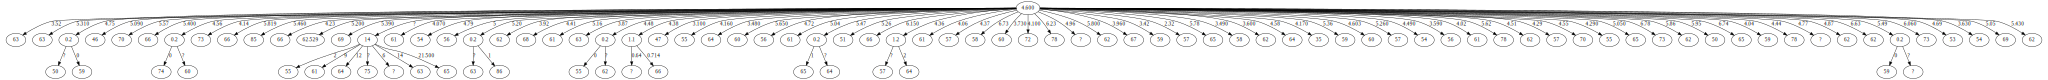

In [308]:
d.getGraph()

In [309]:
print(d.tree.no_leafs)

91


In [310]:
d.get_rules()

['4.600 ->  ( 3.52 ) 63',
 '4.600 ->  ( 5.310 ) 63',
 '4.600 ->  ( 4.75 ) 0.2 ->  ( ? ) 50',
 '4.600 ->  ( 4.75 ) 0.2 ->  ( 0 ) 59',
 '4.600 ->  ( 5.090 ) 46',
 '4.600 ->  ( 5.57 ) 70',
 '4.600 ->  ( 5.400 ) 66',
 '4.600 ->  ( 4.56 ) 0.2 ->  ( 0 ) 74',
 '4.600 ->  ( 4.56 ) 0.2 ->  ( ? ) 60',
 '4.600 ->  ( 4.14 ) 73',
 '4.600 ->  ( 5.819 ) 66',
 '4.600 ->  ( 5.460 ) 85',
 '4.600 ->  ( 4.23 ) 66',
 '4.600 ->  ( 5.200 ) 62.529',
 '4.600 ->  ( 5.390 ) 69',
 '4.600 ->  ( ? ) 14 ->  ( 2 ) 55',
 '4.600 ->  ( ? ) 14 ->  ( 9 ) 61',
 '4.600 ->  ( ? ) 14 ->  ( 12 ) 64',
 '4.600 ->  ( ? ) 14 ->  ( ? ) 75',
 '4.600 ->  ( ? ) 14 ->  ( 6 ) ?',
 '4.600 ->  ( ? ) 14 ->  ( 14 ) 63',
 '4.600 ->  ( ? ) 14 ->  ( 21.500 ) 65',
 '4.600 ->  ( 4.070 ) 61',
 '4.600 ->  ( 4.79 ) 54',
 '4.600 ->  ( 5 ) 56',
 '4.600 ->  ( 5.20 ) 0.2 ->  ( ? ) 63',
 '4.600 ->  ( 5.20 ) 0.2 ->  ( 1 ) 86',
 '4.600 ->  ( 3.92 ) 62',
 '4.600 ->  ( 4.41 ) 68',
 '4.600 ->  ( 5.16 ) 61',
 '4.600 ->  ( 3.87 ) 63',
 '4.600 ->  ( 4.48 ) 0.2 

In [311]:
inp=[]
n=1000
n=n if n < len(test_df) else len(test_df)
for i in range(n):
  inp.append(test_df.iloc[i].to_dict())
print(d.predict(inp))


['Not valid instance, path: 4.600 ( 5.250 ) -> ', 'Not valid instance, path: 4.600 ( 5.02 ) -> ', '59', '58', '73', 'Not valid instance, path: 4.600 ( 5.750 ) -> ', '54', '60', '86', 'Not valid instance, path: 4.600 ( 4.12 ) -> ', '56', '59', 'Not valid instance, path: 4.600 ( 4.85 ) -> ', '62.529', '?', '60', '65', '64', 'Not valid instance, path: 4.600 ( 4.230 ) -> ', 'Not valid instance, path: 4.600 ( 3.880 ) -> ', '60', '62', 'Not valid instance, path: 4.600 ( ? ) -> 14 ( 28 ) -> ', '55', '64', '54', 'Not valid instance, path: 4.600 ( 4.42 ) -> ', '?', '60', '59', '62', '53', '61', 'Not valid instance, path: 4.600 ( 4.270 ) -> ', '61', 'Not valid instance, path: 4.600 ( 5.30 ) -> ', '47', '63', '64']


In [312]:
d.tree.printt()

| 4.600
|----- ( 3.52) 63
|----- ( 5.310) 63
|----- ( 4.75) 0.2
|---------- ( ?) 50
|---------- ( 0) 59
|----- ( 5.090) 46
|----- ( 5.57) 70
|----- ( 5.400) 66
|----- ( 4.56) 0.27
|---------- ( 0) 74
|---------- ( ?) 60
|----- ( 4.14) 73
|----- ( 5.819) 66
|----- ( 5.460) 85
|----- ( 4.23) 66
|----- ( 5.200) 62.529
|----- ( 5.390) 69
|----- ( ?) 14
|---------- ( 2) 55
|---------- ( 9) 61
|---------- ( 12) 64
|---------- ( ?) 75
|---------- ( 6) ?
|---------- ( 14) 63
|---------- ( 21.500) 65
|----- ( 4.070) 61
|----- ( 4.79) 54
|----- ( 5) 56
|----- ( 5.20) 0.226
|---------- ( ?) 63
|---------- ( 1) 86
|----- ( 3.92) 62
|----- ( 4.41) 68
|----- ( 5.16) 61
|----- ( 3.87) 63
|----- ( 4.48) 0.233
|---------- ( 0) 55
|---------- ( ?) 62
|----- ( 4.38) 1.1
|---------- ( 0.64) ?
|---------- ( 0.714) 66
|----- ( 3.100) 47
|----- ( 4.160) 55
|----- ( 3.480) 64
|----- ( 5.650) 60
|----- ( 4.72) 56
|----- ( 5.04) 61
|----- ( 5.47) 0.244
|---------- ( 1) 65
|---------- ( ?) 64
|----- ( 5.26) 51
|

In [313]:
o=list(enumerate(d.predict(data)))
o

[(0, '72'),
 (1, 'Not valid instance, path: 4.600 ( 3.420 ) -> '),
 (2, '60'),
 (3, 'Not valid instance, path: 4.600 ( 5.750 ) -> '),
 (4, 'Not valid instance, path: 4.600 ( 4.310 ) -> '),
 (5, '62'),
 (6, 'Not valid instance, path: 4.600 ( 5.250 ) -> '),
 (7, '46'),
 (8, '54'),
 (9, 'Not valid instance, path: 4.600 ( 4.230 ) -> '),
 (10, '62'),
 (11, 'Not valid instance, path: 4.600 ( 4 ) -> '),
 (12, '60'),
 (13, '62'),
 (14, '55'),
 (15, 'Not valid instance, path: 4.600 ( 4.650 ) -> '),
 (16, '62.529'),
 (17, '66'),
 (18, '66'),
 (19, '69'),
 (20, '85'),
 (21, '73'),
 (22, 'Not valid instance, path: 4.600 ( 4.650 ) -> '),
 (23, '64'),
 (24, 'Not valid instance, path: 4.600 ( 3.850 ) -> '),
 (25, '35'),
 (26, '55'),
 (27, '75'),
 (28, '55'),
 (29, '65'),
 (30, 'Not valid instance, path: 4.600 ( 5.320 ) -> '),
 (31, '?'),
 (32, '47'),
 (33, '63'),
 (34, '61'),
 (35, '63'),
 (36, '65'),
 (37, 'Not valid instance, path: 4.600 ( 3.880 ) -> '),
 (38, 'Not valid instance, path: 4.600 ( 4.3

In [314]:
data[target_name]

0      72
1      55
2      60
3      57
4      68
       ..
125    64
126    64
127    69
128    57
129    62
Name: 71, Length: 130, dtype: object

In [315]:
count=0
for i in o:
  if i[1]=='Not valid instance':
    print("Something went wrong")
    count+=1
print(count)

0


In [316]:
print(df.iloc[0].to_dict())
d.predict(df.iloc[0].to_dict(),trace=True)

{'11': '1.25', '0': 1, '71': '63', '0.1': 0, '0.260': '0.30', '9': '6.9', '4.600': '3.52', '14': '18.16', '1': '1.51', '1.1': '0.857', 'name': 'name', '1.2': '2', '0.2': '1'}
4.600 ( 3.52 ) -> 63


'63'